In [1]:
import numpy as np
import pandas as pd

%matplotlib inline

# generate a daily signal covering one year 2016 in a pandas dataframe
N = 360
df_train = pd.DataFrame({"Date" : pd.date_range(start="2016-01-25", periods=N, freq='D'),
                         "Signal" : (np.arange(N)//40 + np.arange(N) % 21 + np.random.randn(N))})


In [2]:
df_train.head(12)

,Date,Signal
0,2016-01-25,0.880853
1,2016-01-26,2.199877
2,2016-01-27,0.970246
3,2016-01-28,2.388152
4,2016-01-29,4.635198
5,2016-01-30,3.948748
6,2016-01-31,6.447459
7,2016-02-01,6.695498
8,2016-02-02,8.606010
9,2016-02-03,8.940483


In [3]:
df_train.tail(12)

,Date,Signal
348,2017-01-07,18.144331
349,2017-01-08,19.602178
350,2017-01-09,23.108227
351,2017-01-10,23.150759
352,2017-01-11,26.321980
353,2017-01-12,27.944177
354,2017-01-13,25.644317
355,2017-01-14,27.213906
356,2017-01-15,27.459849
357,2017-01-16,8.232758


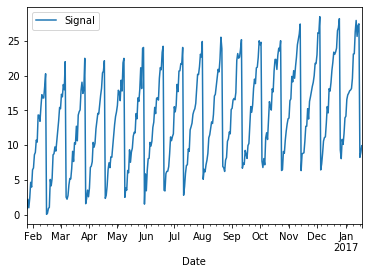

In [4]:
df_train.plot('Date' , ['Signal'])

In [5]:

import pyaf.ForecastEngine as autof
# create a forecast engine. This is the main object handling all the operations
lEngine = autof.cForecastEngine()

# get the best time series model for predicting one week
lEngine.train(iInputDS = df_train, iTime = 'Date', iSignal = 'Signal', iHorizon = 7);
lEngine.getModelInfo() # => relative error 7% (MAPE)


INFO:pyaf.std:START_TRAINING 'Signal'
INFO:pyaf.std:END_TRAINING_TIME_IN_SECONDS 'Signal' 3.631828546524048
INFO:pyaf.std:TIME_DETAIL TimeVariable='Date' TimeMin=2016-01-25T00:00:00.000000 TimeMax=2016-11-01T00:00:00.000000 TimeDelta=<DateOffset: days=1> Horizon=7
INFO:pyaf.std:SIGNAL_DETAIL_ORIG SignalVariable='Signal' Length=360  Min=0.027145525383264396 Max=28.491166521760682  Mean=13.9752651851156 StdDev=6.745464386032752
INFO:pyaf.std:SIGNAL_DETAIL_TRANSFORMED TransformedSignalVariable='_Signal' Min=0.027145525383264396 Max=28.491166521760682  Mean=13.9752651851156 StdDev=6.745464386032752
INFO:pyaf.std:BEST_TRANSOFORMATION_TYPE '_'
INFO:pyaf.std:BEST_DECOMPOSITION  '_Signal_LinearTrend_residue_zeroCycle_residue_AR(64)' [LinearTrend + NoCycle + AR]
INFO:pyaf.std:TREND_DETAIL '_Signal_LinearTrend' [LinearTrend]
INFO:pyaf.std:CYCLE_DETAIL '_Signal_LinearTrend_residue_zeroCycle' [NoCycle]
INFO:pyaf.std:AUTOREG_DETAIL '_Signal_LinearTrend_residue_zeroCycle_residue_AR(64)' [AR]
INFO:py

INFO:pyaf.std:START_PLOTTING
INFO:pyaf.std:END_PLOTTING_TIME_IN_SECONDS 1.3208849430084229


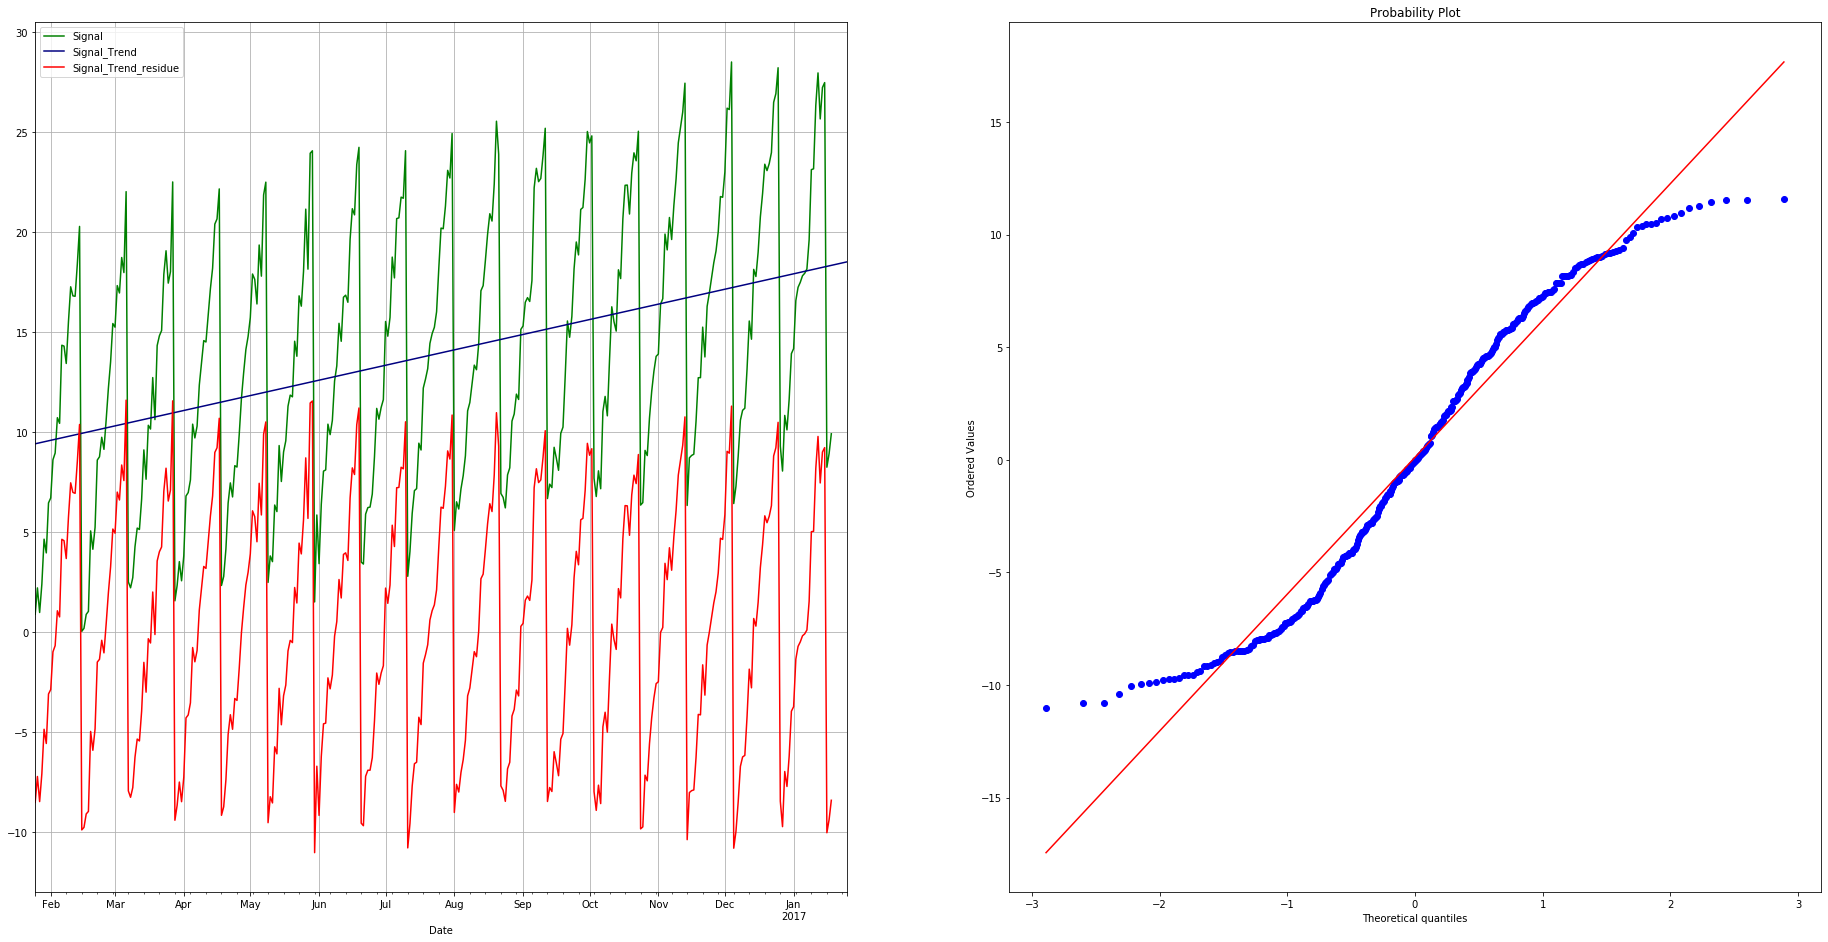

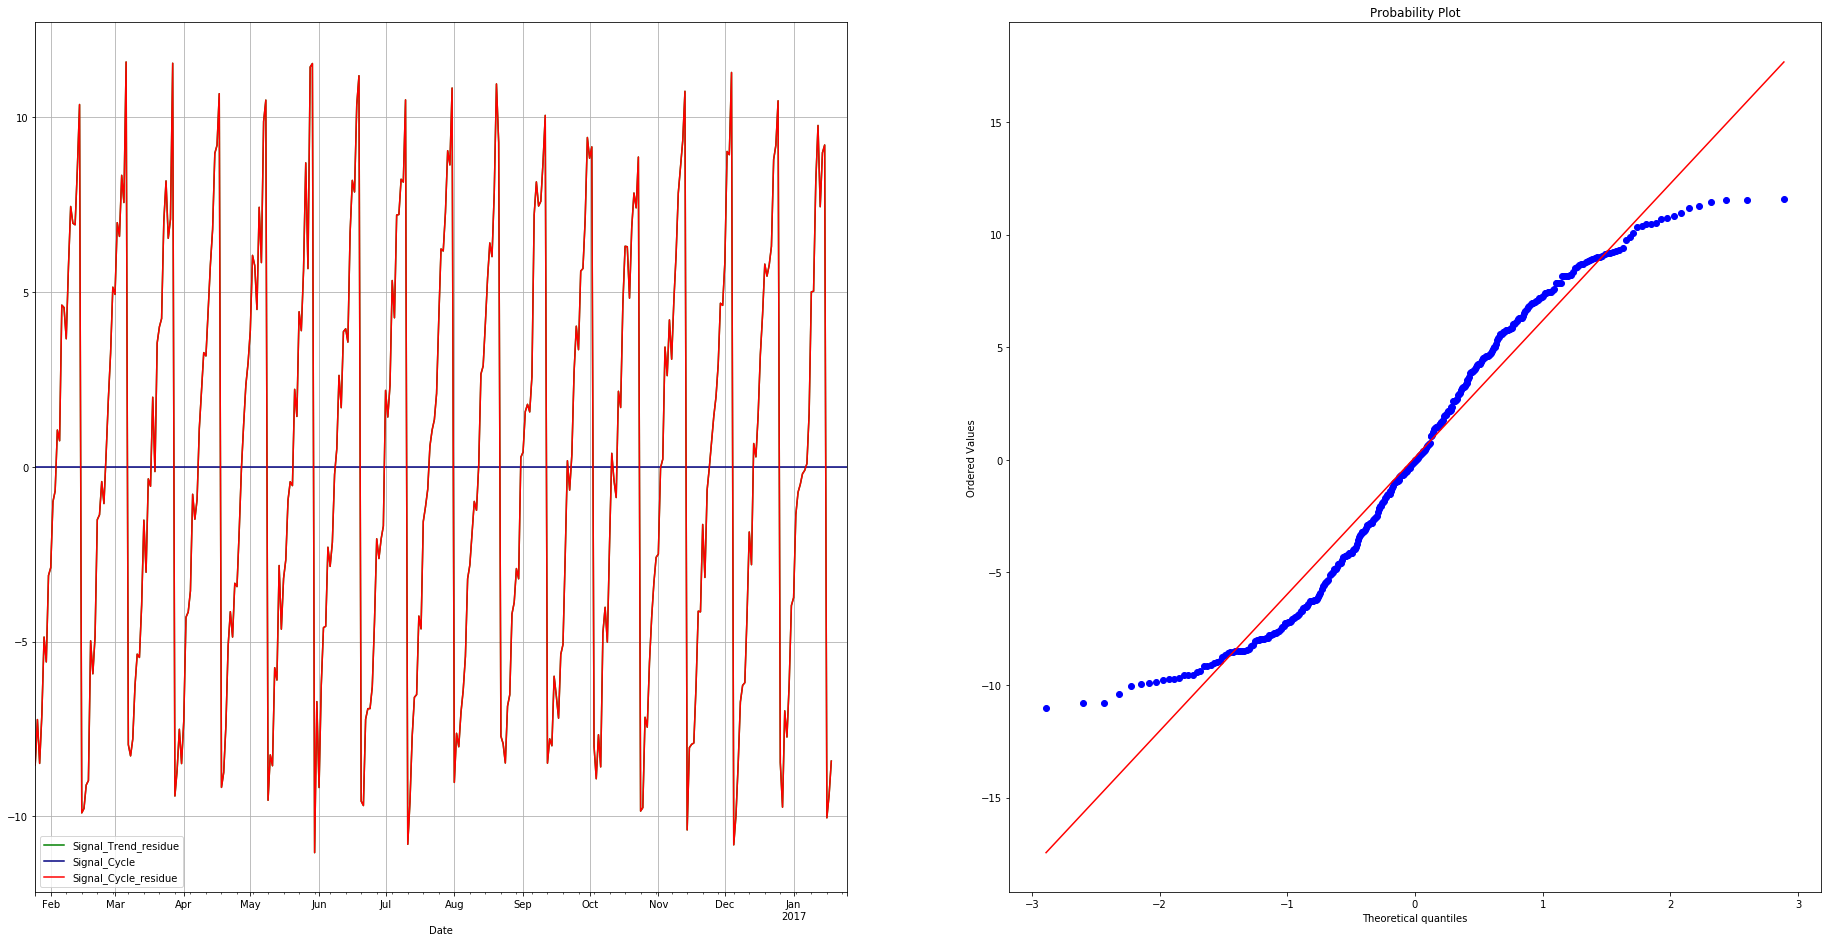

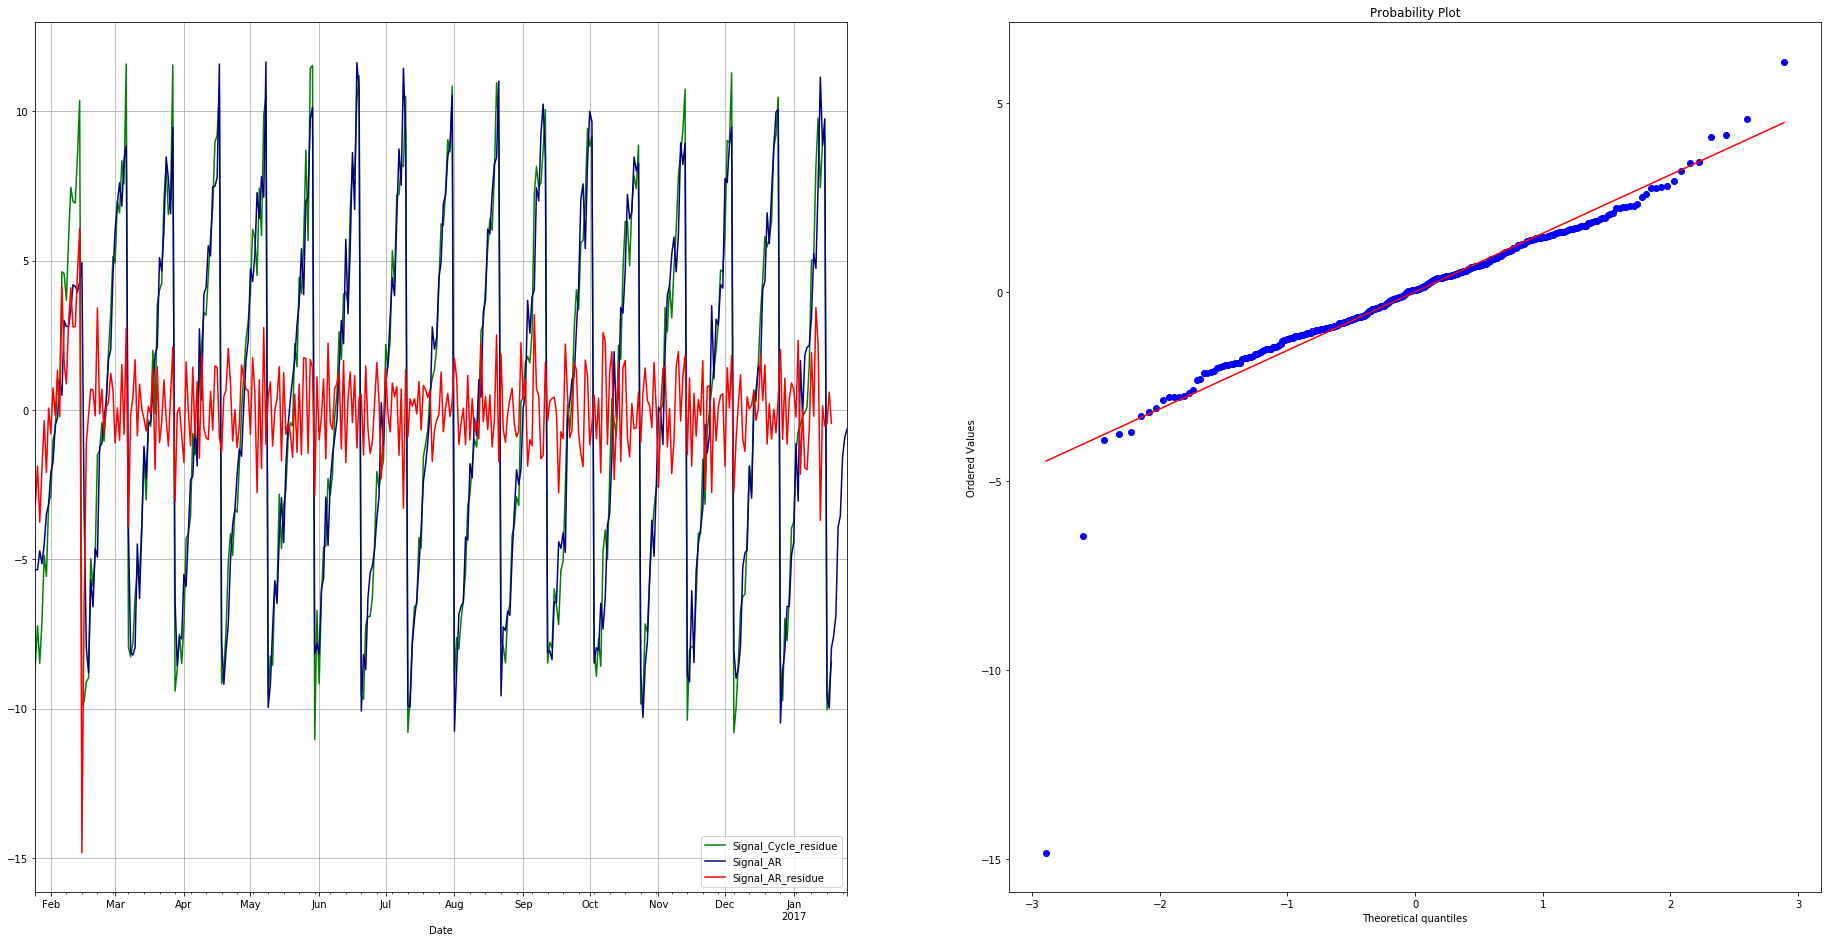

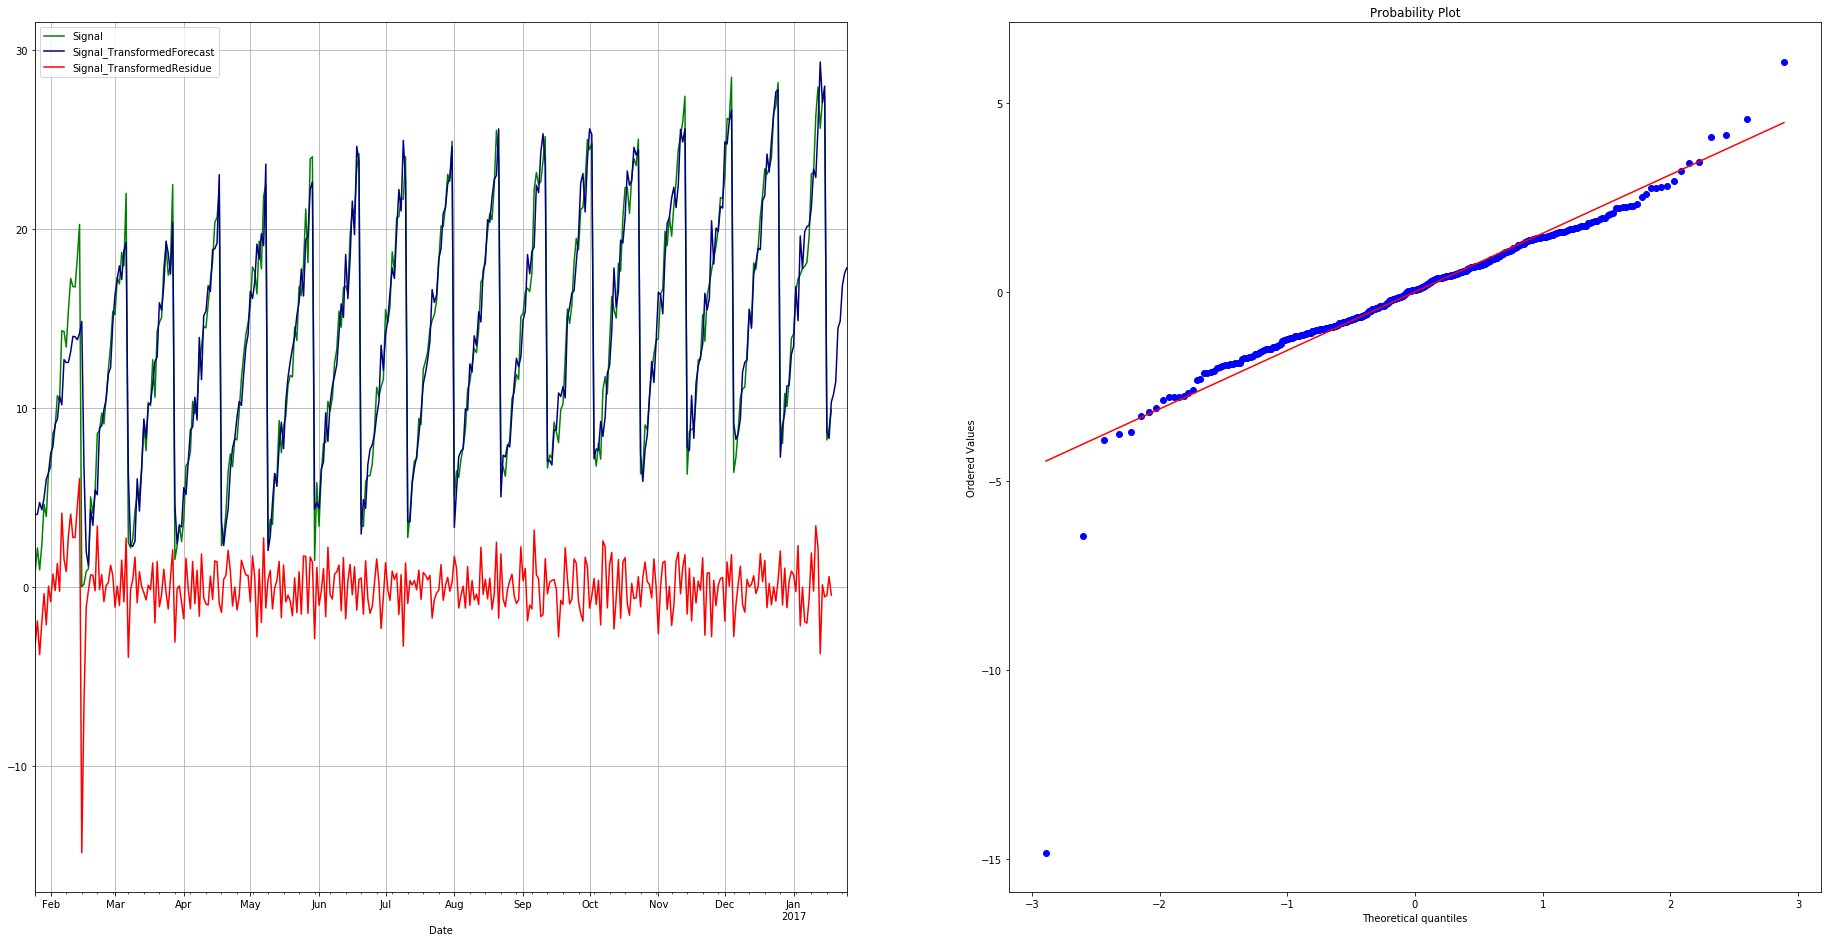

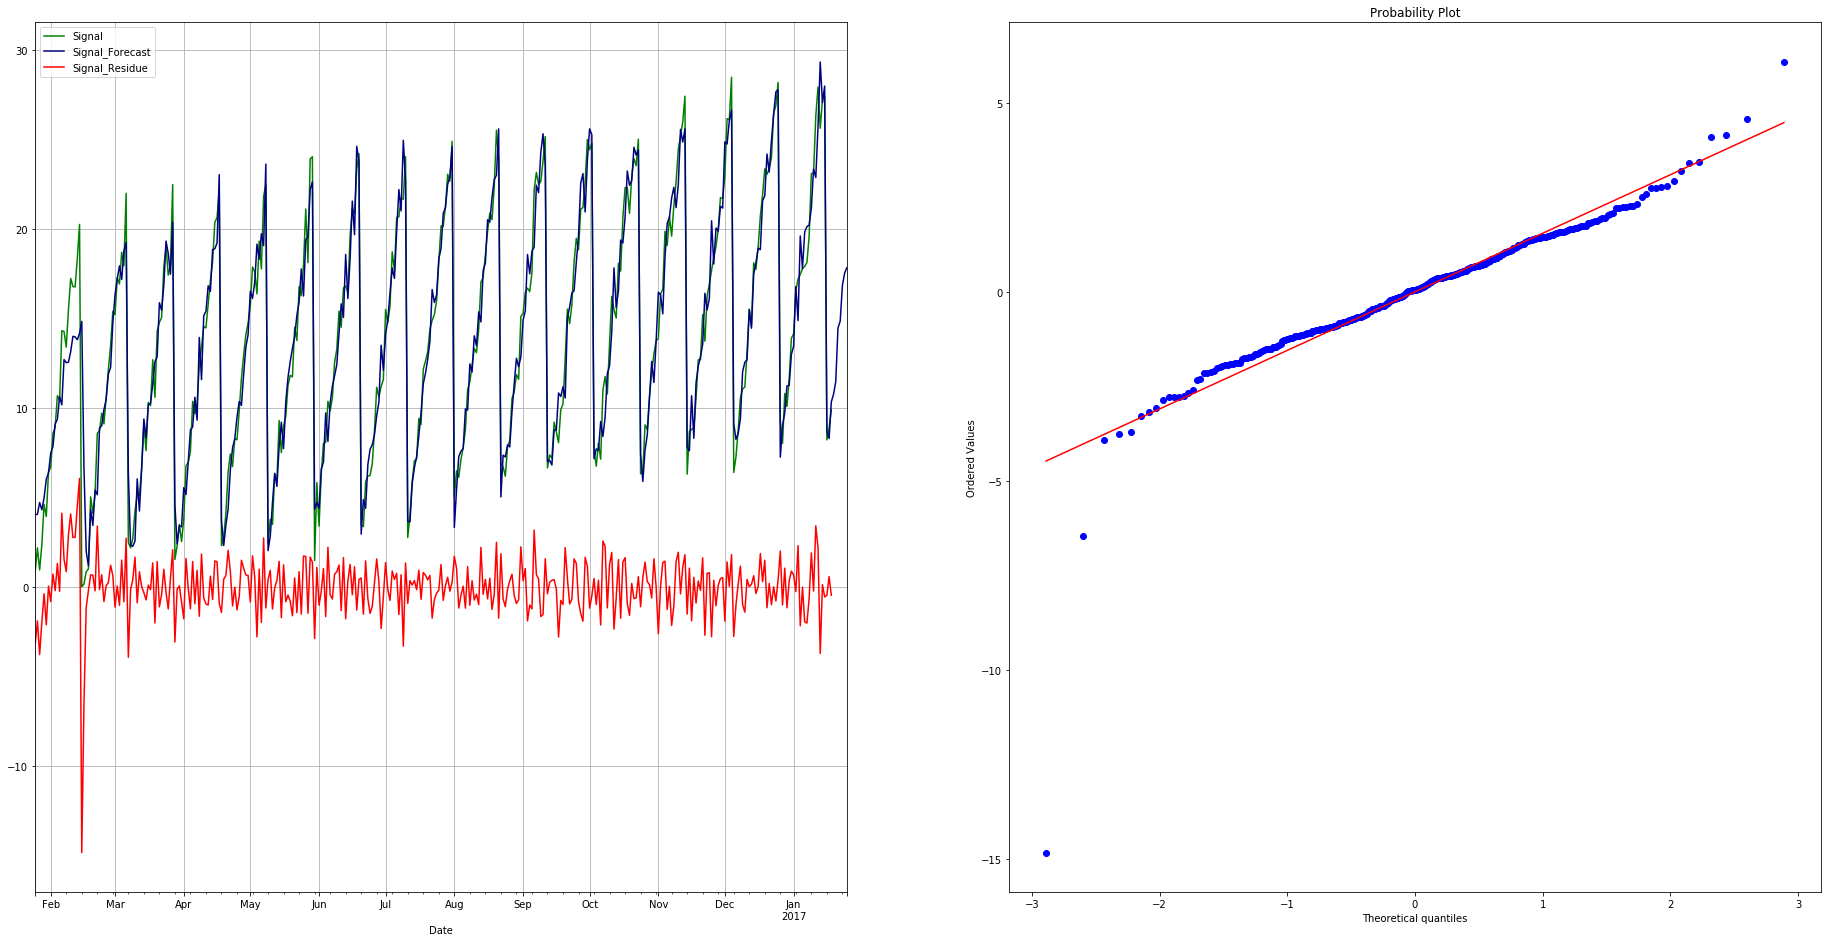

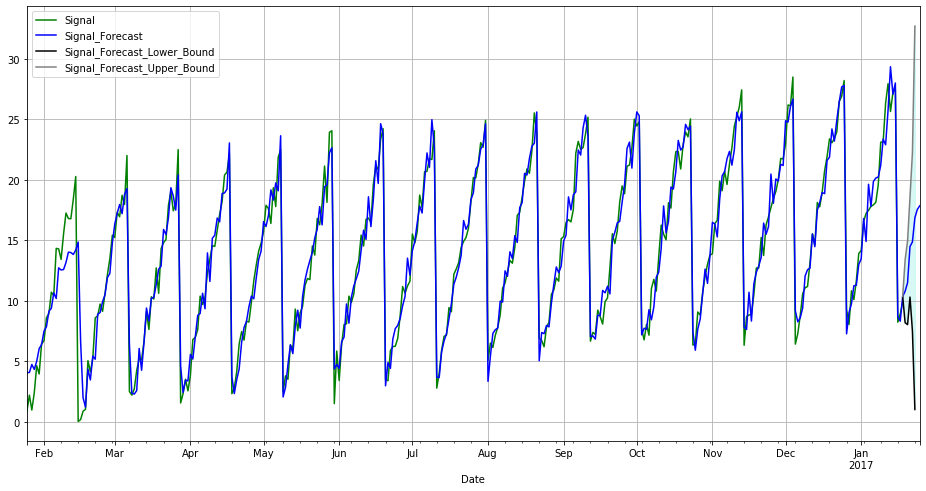

In [6]:
lEngine.standardPlots()

In [7]:

# predict one week
df_forecast = lEngine.forecast(iInputDS = df_train, iHorizon = 7)
# list the columns of the forecast dataset
print(df_forecast.columns) #

# print the real forecasts
# Future dates : ['2017-01-19T00:00:00.000000000' '2017-01-20T00:00:00.000000000' '2017-01-21T00:00:00.000000000' '2017-01-22T00:00:00.000000000' '2017-01-23T00:00:00.000000000' '2017-01-24T00:00:00.000000000' '2017-01-25T00:00:00.000000000']
print(df_forecast['Date'].tail(7).values)

# signal forecast : [ 9.74934646  10.04419761  12.15136455  12.20369717  14.09607727 15.68086323  16.22296559]
print(df_forecast['Signal_Forecast'].tail(7).values)

INFO:pyaf.std:START_FORECASTING 'Signal'
INFO:pyaf.std:END_FORECAST_TIME_IN_SECONDS  'Signal' 0.44658970832824707


Index(['Date', 'Signal', 'row_number', 'Date_Normalized', '_Signal',
       '_Signal_LinearTrend', '_Signal_LinearTrend_residue',
       '_Signal_LinearTrend_residue_zeroCycle',
       '_Signal_LinearTrend_residue_zeroCycle_residue',
       '_Signal_LinearTrend_residue_zeroCycle_residue_AR(64)',
       '_Signal_LinearTrend_residue_zeroCycle_residue_AR(64)_residue',
       '_Signal_Trend', '_Signal_Trend_residue', '_Signal_Cycle',
       '_Signal_Cycle_residue', '_Signal_AR', '_Signal_AR_residue',
       '_Signal_TransformedForecast', 'Signal_Forecast',
       '_Signal_TransformedResidue', 'Signal_Residue',
       'Signal_Forecast_Lower_Bound', 'Signal_Forecast_Upper_Bound'],
      dtype='object')
['2017-01-19T00:00:00.000000000' '2017-01-20T00:00:00.000000000'
 '2017-01-21T00:00:00.000000000' '2017-01-22T00:00:00.000000000'
 '2017-01-23T00:00:00.000000000' '2017-01-24T00:00:00.000000000'
 '2017-01-25T00:00:00.000000000']
[10.78370814 11.48682772 14.48123274 14.86866055 16.85808307 17.5

In [8]:
import pickle

In [9]:
lEngine_str = pickle.dumps(lEngine)

In [10]:
lEngine_reloaded = pickle.loads(lEngine_str)

In [11]:
df_forecast_aftrer_reload = lEngine_reloaded.forecast(iInputDS = df_train, iHorizon = 7)

INFO:pyaf.std:START_FORECASTING 'Signal'
INFO:pyaf.std:END_FORECAST_TIME_IN_SECONDS  'Signal' 0.44721293449401855


In [12]:
df_forecast_aftrer_reload

,Date,Signal,row_number,Date_Normalized,_Signal,_Signal_LinearTrend,_Signal_LinearTrend_residue,_Signal_LinearTrend_residue_zeroCycle,_Signal_LinearTrend_residue_zeroCycle_residue,_Signal_LinearTrend_residue_zeroCycle_residue_AR(64),...,_Signal_Cycle,_Signal_Cycle_residue,_Signal_AR,_Signal_AR_residue,_Signal_TransformedForecast,Signal_Forecast,_Signal_TransformedResidue,Signal_Residue,Signal_Forecast_Lower_Bound,Signal_Forecast_Upper_Bound
0,2016-01-25,0.880853,0,0.000000,0.880853,9.403691,-8.522838,0.0,-8.522838,-5.349540,...,0.0,-8.522838,-5.349540,-3.173299,4.054151,4.054151,-3.173299,-3.173299,NaN,NaN
1,2016-01-26,2.199877,1,0.003559,2.199877,9.428536,-7.228659,0.0,-7.228659,-5.349540,...,0.0,-7.228659,-5.349540,-1.879119,4.078996,4.078996,-1.879119,-1.879119,NaN,NaN
2,2016-01-27,0.970246,2,0.007117,0.970246,9.453381,-8.483135,0.0,-8.483135,-4.720084,...,0.0,-8.483135,-4.720084,-3.763051,4.733296,4.733296,-3.763051,-3.763051,NaN,NaN
3,2016-01-28,2.388152,3,0.010676,2.388152,9.478226,-7.090074,0.0,-7.090074,-5.150420,...,0.0,-7.090074,-5.150420,-1.939654,4.327805,4.327805,-1.939654,-1.939654,NaN,NaN
4,2016-01-29,4.635198,4,0.014235,4.635198,9.503070,-4.867872,0.0,-4.867872,-4.506157,...,0.0,-4.867872,-4.506157,-0.361715,4.996913,4.996913,-0.361715,-0.361715,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,2017-01-21,NaN,362,1.288256,NaN,18.397524,NaN,0.0,NaN,-3.916292,...,0.0,NaN,-3.916292,NaN,14.481233,14.481233,NaN,NaN,10.306208,18.656258
363,2017-01-22,NaN,363,1.291815,NaN,18.422369,NaN,0.0,NaN,-3.553709,...,0.0,NaN,-3.553709,NaN,14.868661,14.868661,NaN,NaN,7.486350,22.250971
364,2017-01-23,NaN,364,1.295374,NaN,18.447214,NaN,0.0,NaN,-1.589131,...,0.0,NaN,-1.589131,NaN,16.858083,16.858083,NaN,NaN,1.011813,32.704353
365,2017-01-24,NaN,365,1.298932,NaN,18.472059,NaN,0.0,NaN,-0.923228,...,0.0,NaN,-0.923228,NaN,17.548831,17.548831,NaN,NaN,-22.589787,57.687449


INFO:pyaf.std:START_PLOTTING
INFO:pyaf.std:END_PLOTTING_TIME_IN_SECONDS 1.3359224796295166


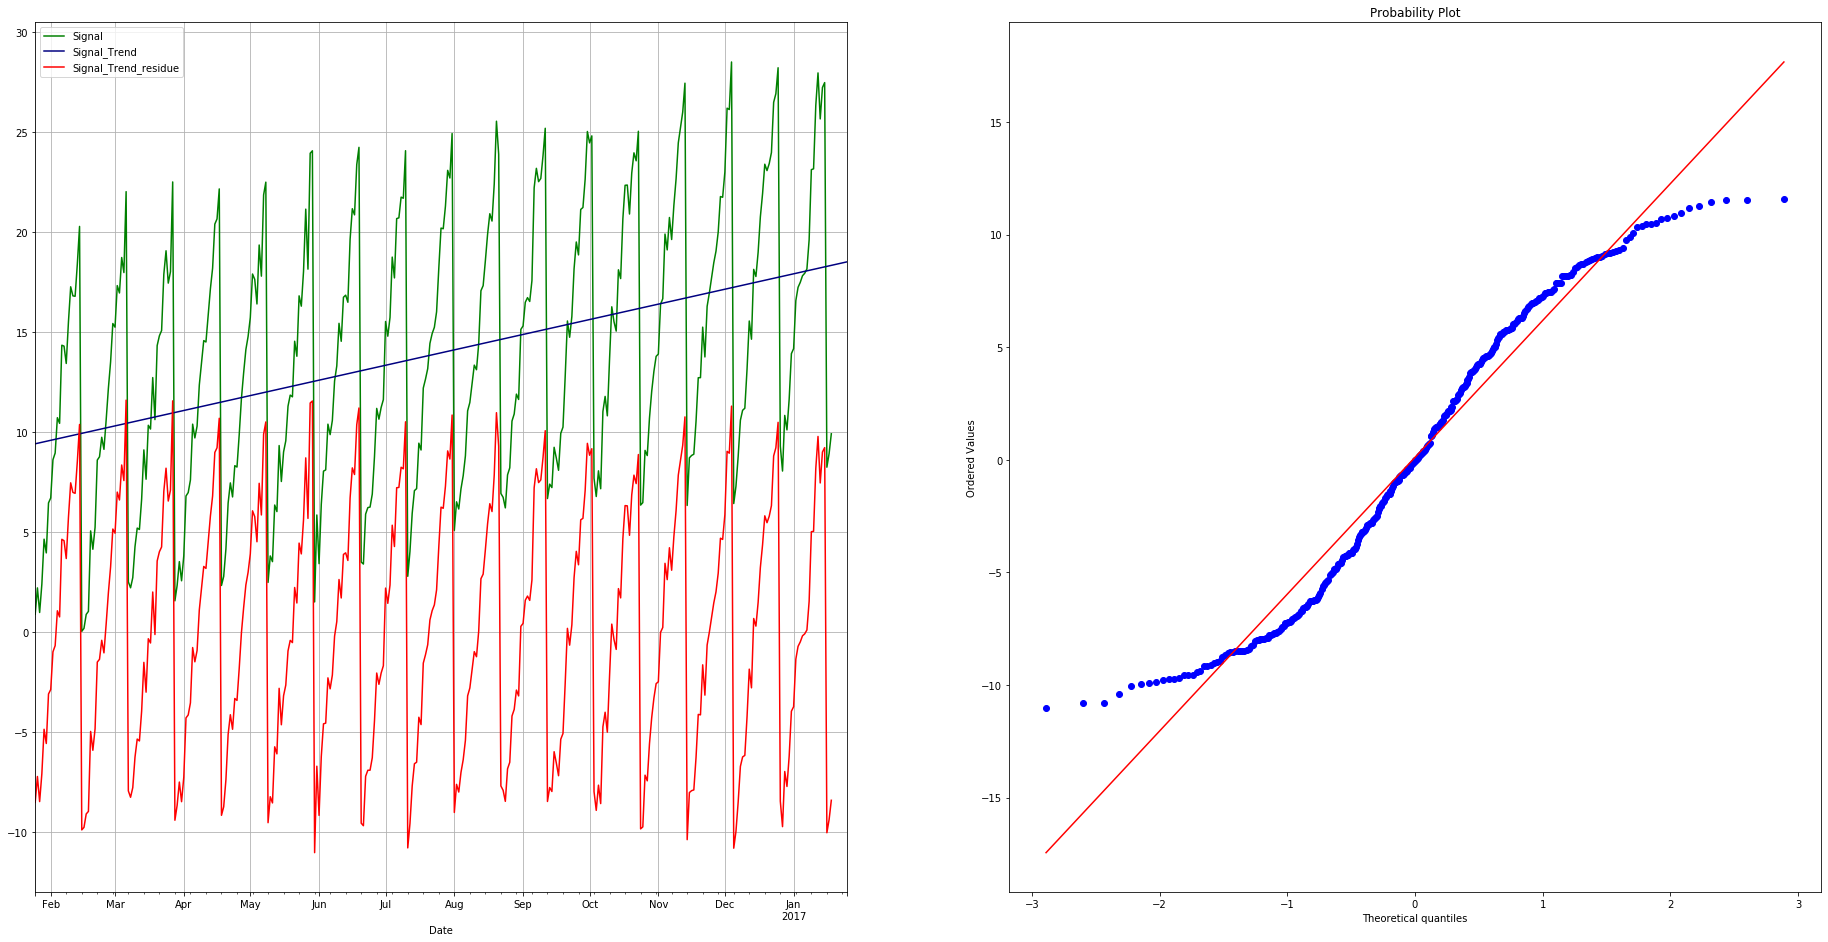

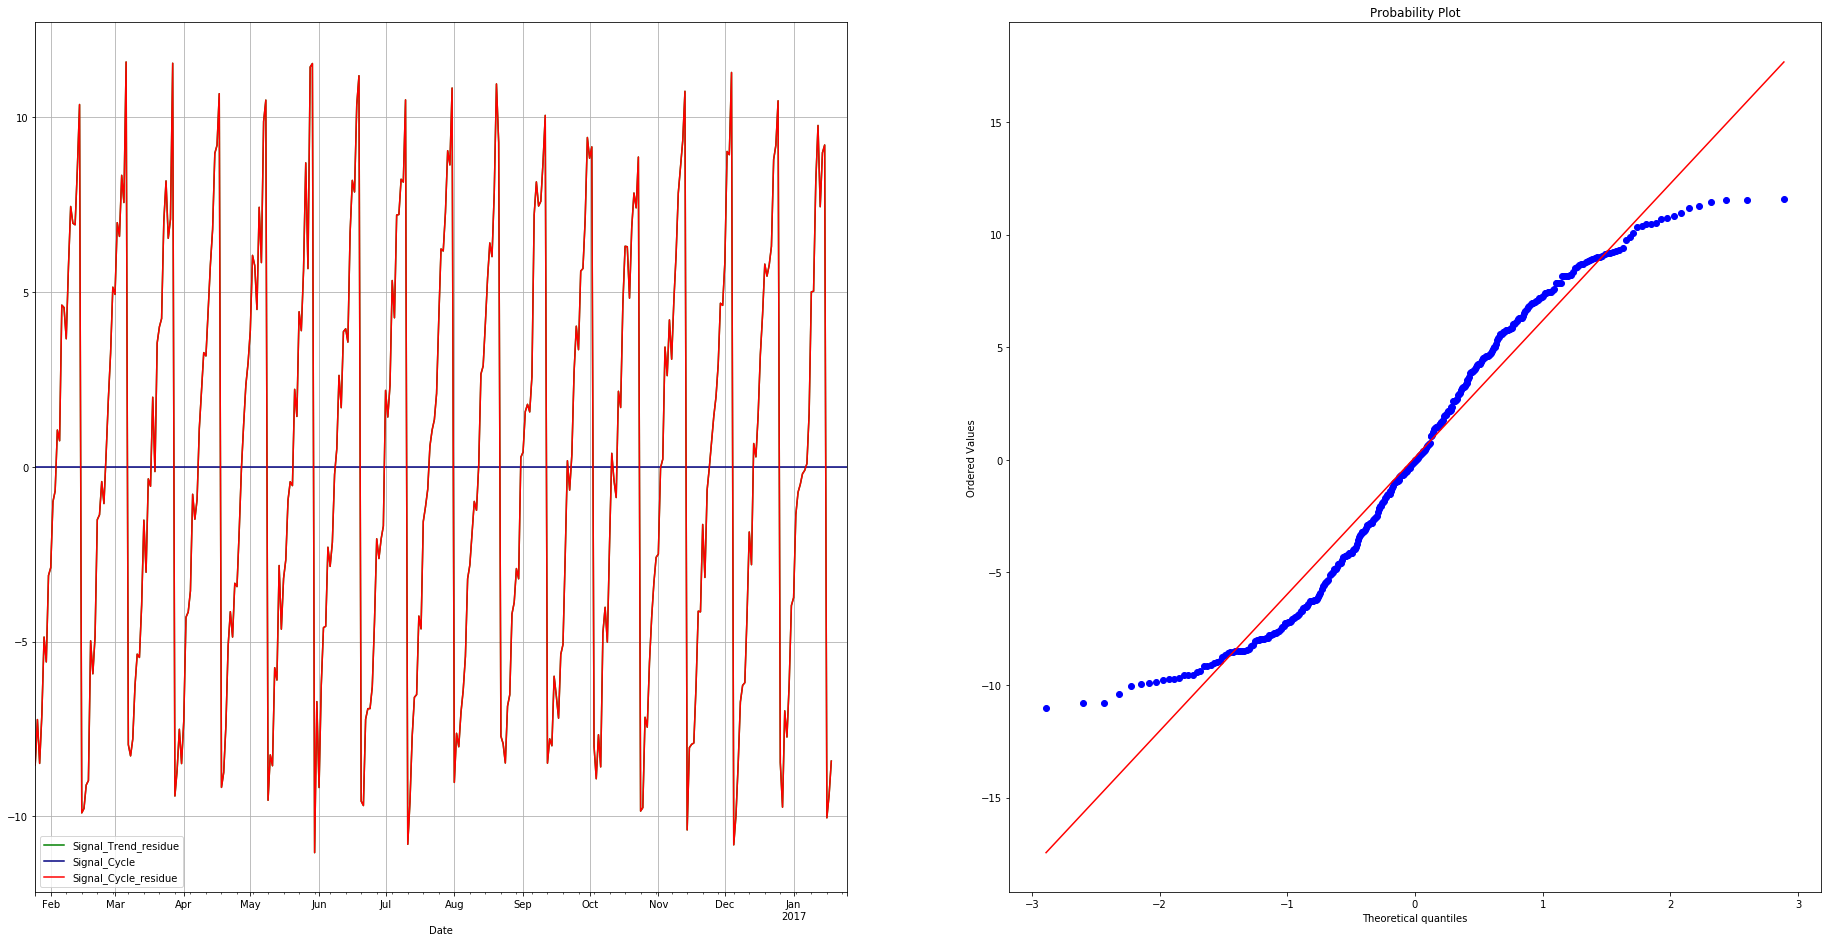

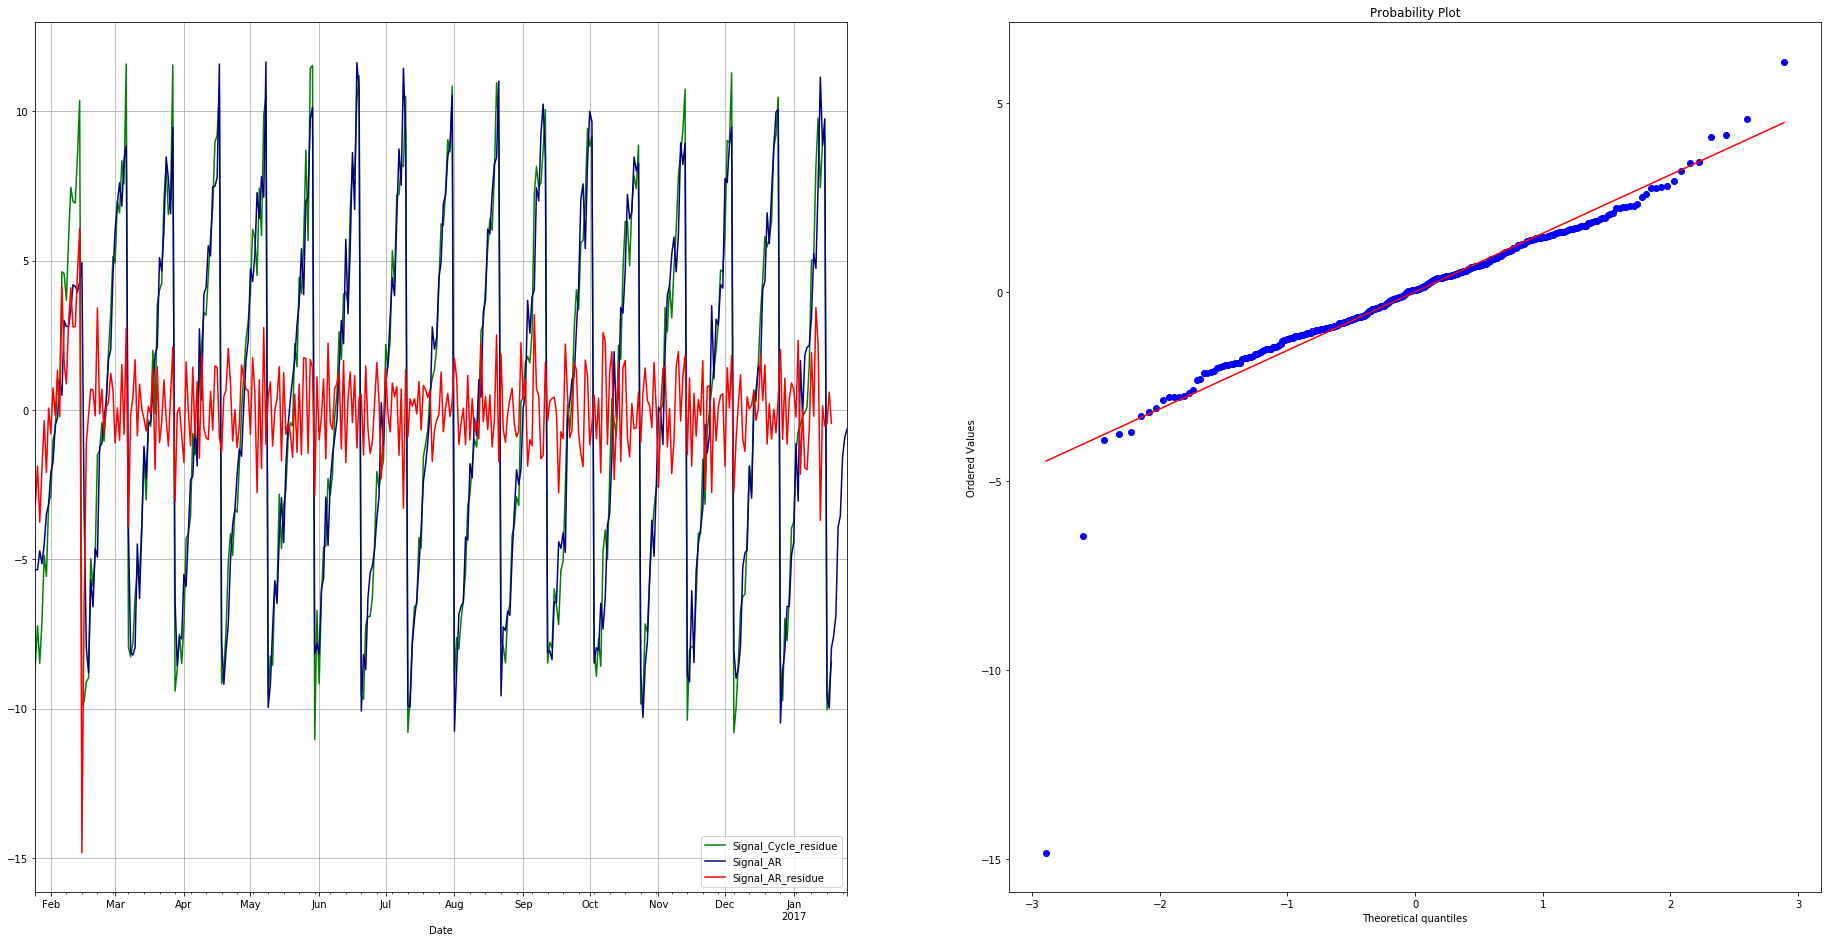

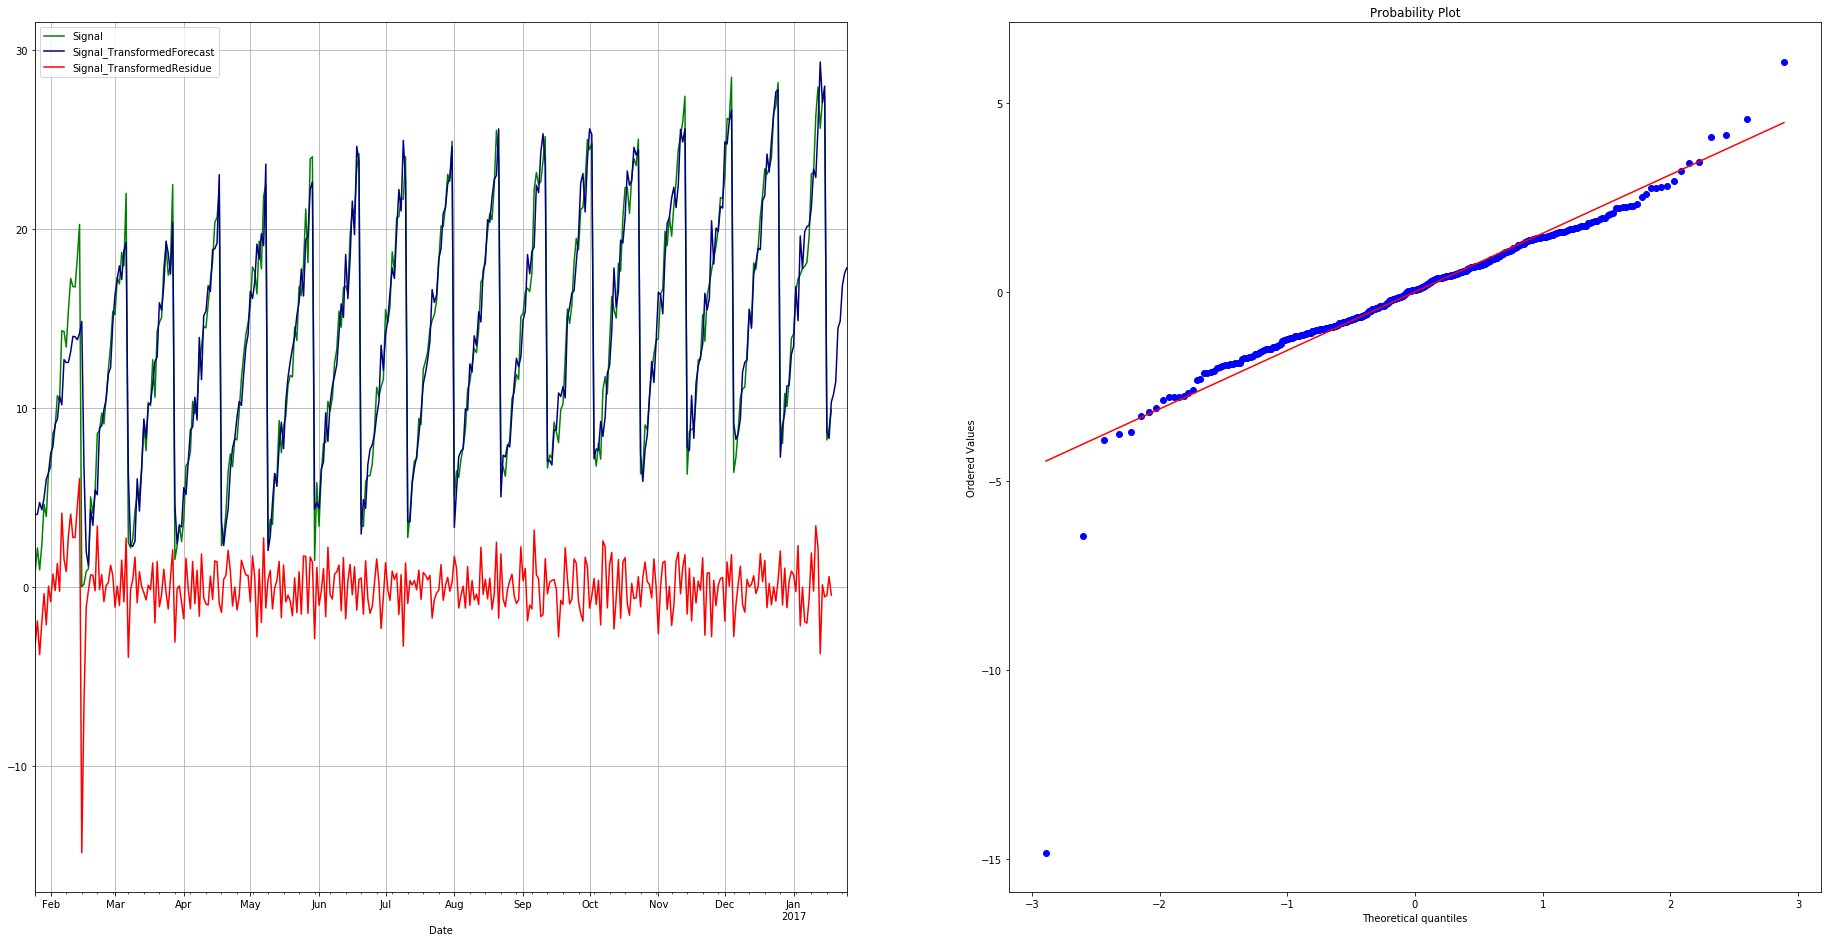

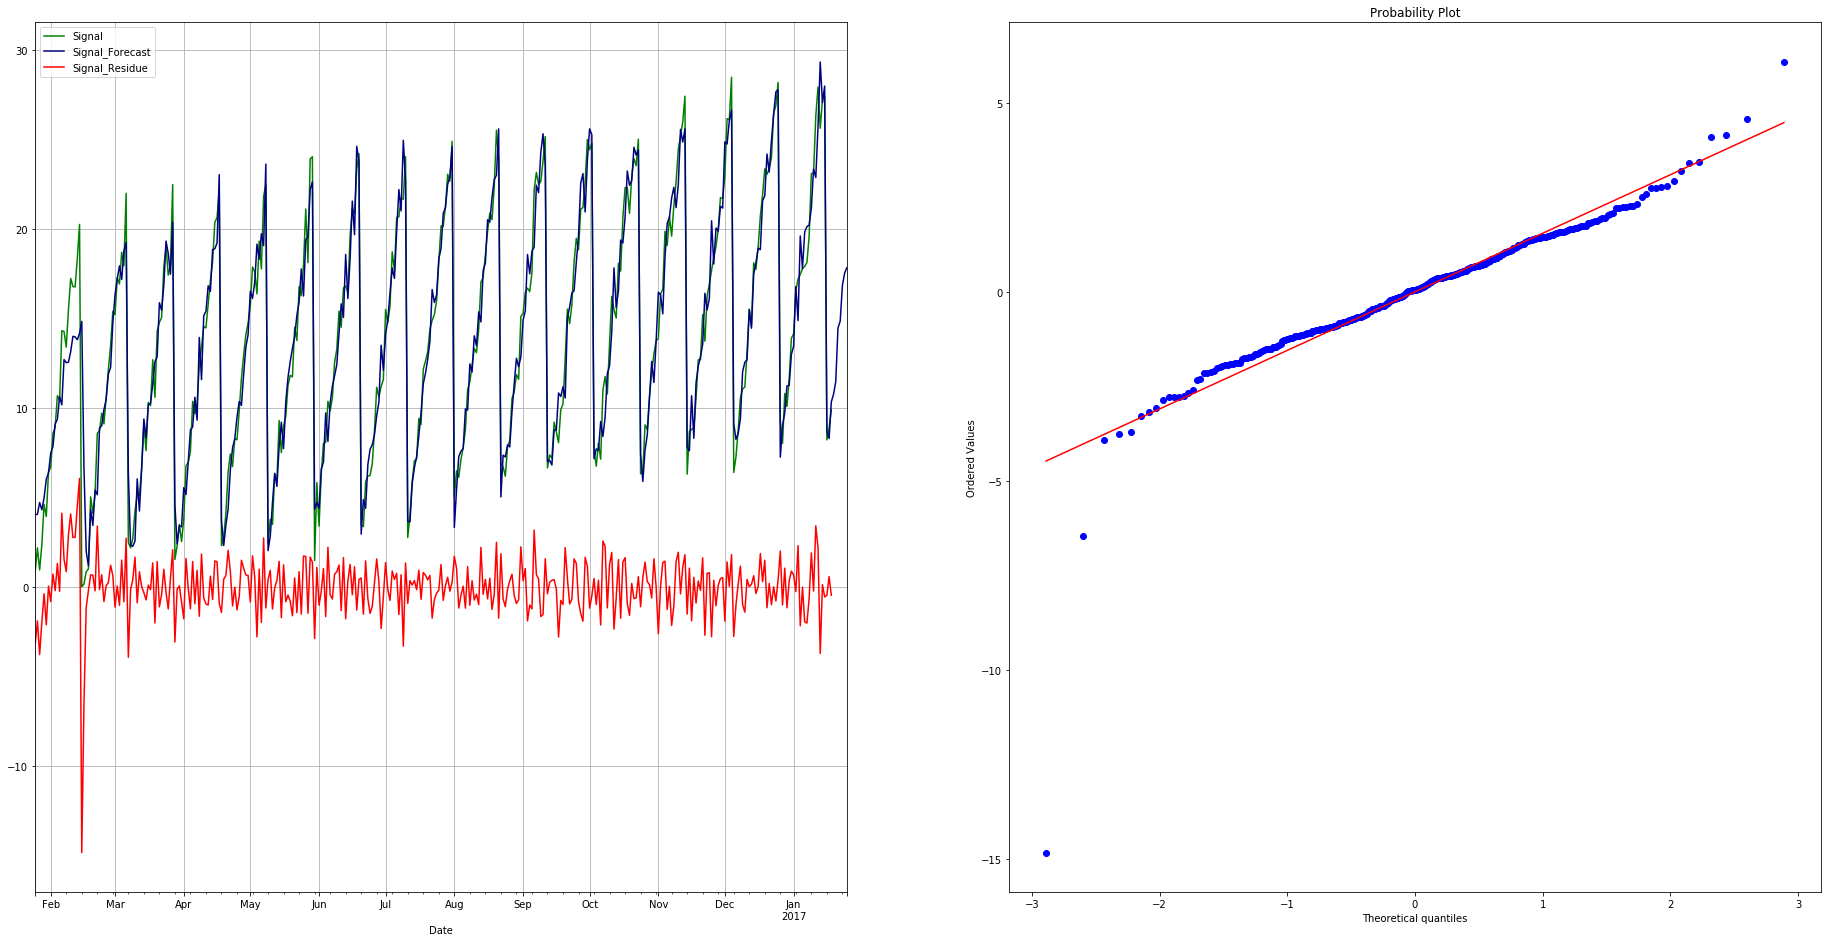

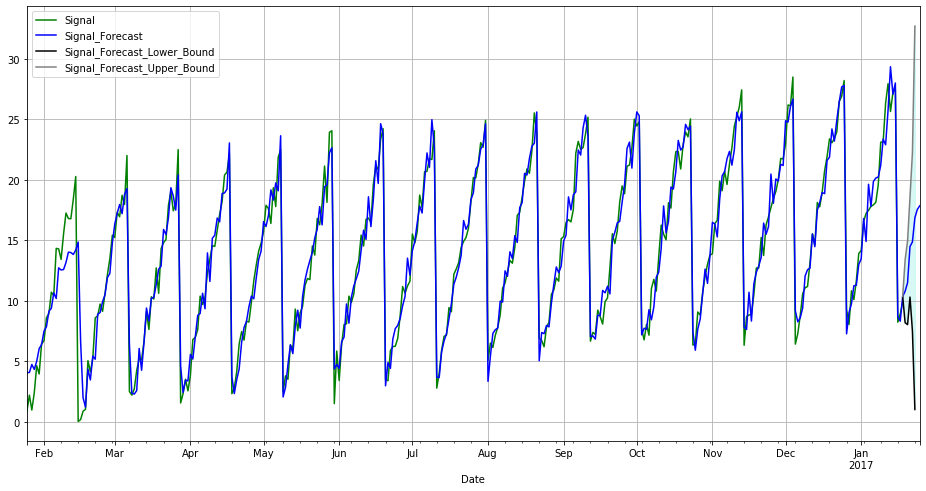

In [13]:
lEngine_reloaded.standardPlots()

In [14]:
df_forecast.describe()

,Signal,row_number,Date_Normalized,_Signal,_Signal_LinearTrend,_Signal_LinearTrend_residue,_Signal_LinearTrend_residue_zeroCycle,_Signal_LinearTrend_residue_zeroCycle_residue,_Signal_LinearTrend_residue_zeroCycle_residue_AR(64),_Signal_LinearTrend_residue_zeroCycle_residue_AR(64)_residue,...,_Signal_Cycle,_Signal_Cycle_residue,_Signal_AR,_Signal_AR_residue,_Signal_TransformedForecast,Signal_Forecast,_Signal_TransformedResidue,Signal_Residue,Signal_Forecast_Lower_Bound,Signal_Forecast_Upper_Bound
count,360.000000,367.000000,367.000000,360.000000,367.000000,360.000000,367.0,360.000000,367.000000,360.000000,...,367.0,360.000000,367.000000,360.000000,367.000000,367.000000,360.000000,360.000000,7.000000,7.000000
mean,13.975265,183.000000,0.651246,13.975265,13.950297,0.111925,0.0,0.111925,0.039526,0.001961,...,0.0,0.111925,0.039526,0.001961,13.989823,13.989823,0.001961,0.001961,-9.625397,39.304157
std,6.754853,106.088014,0.377537,6.754853,2.635740,6.159258,0.0,6.159258,5.905480,1.649212,...,0.0,6.159258,5.905480,1.649212,6.492373,6.492373,1.649212,1.649212,32.979980,36.902631
min,0.027146,0.000000,0.000000,0.027146,9.403691,-11.036882,0.0,-11.036882,-10.758659,-14.825938,...,0.0,-11.036882,-10.758659,-14.825938,1.204604,1.204604,-14.825938,-14.825938,-79.809275,13.380983
25%,8.697157,91.500000,0.325623,8.697157,11.676994,-5.180797,0.0,-5.180797,-4.913539,-0.937420,...,0.0,-5.180797,-4.913539,-0.937420,8.641517,8.641517,-0.937420,-0.937420,-10.788987,16.799716
50%,14.135705,183.000000,0.651246,14.135705,13.950297,-0.031308,0.0,-0.031308,-0.202544,0.059820,...,0.0,-0.031308,-0.202544,0.059820,13.738942,13.738942,0.059820,0.059820,7.486350,22.250971
75%,19.039487,274.500000,0.976868,19.039487,16.223601,5.604705,0.0,5.604705,4.733548,0.967600,...,0.0,5.604705,4.733548,0.967600,18.975615,18.975615,0.967600,0.967600,8.108457,45.195901
max,28.491167,366.000000,1.302491,28.491167,18.496904,11.586469,0.0,11.586469,11.653094,6.079158,...,0.0,11.586469,11.653094,6.079158,29.345681,29.345681,6.079158,6.079158,10.306208,115.505909


In [15]:
df_forecast_aftrer_reload.describe()

,Signal,row_number,Date_Normalized,_Signal,_Signal_LinearTrend,_Signal_LinearTrend_residue,_Signal_LinearTrend_residue_zeroCycle,_Signal_LinearTrend_residue_zeroCycle_residue,_Signal_LinearTrend_residue_zeroCycle_residue_AR(64),_Signal_LinearTrend_residue_zeroCycle_residue_AR(64)_residue,...,_Signal_Cycle,_Signal_Cycle_residue,_Signal_AR,_Signal_AR_residue,_Signal_TransformedForecast,Signal_Forecast,_Signal_TransformedResidue,Signal_Residue,Signal_Forecast_Lower_Bound,Signal_Forecast_Upper_Bound
count,360.000000,367.000000,367.000000,360.000000,367.000000,360.000000,367.0,360.000000,367.000000,360.000000,...,367.0,360.000000,367.000000,360.000000,367.000000,367.000000,360.000000,360.000000,7.000000,7.000000
mean,13.975265,183.000000,0.651246,13.975265,13.950297,0.111925,0.0,0.111925,0.039526,0.001961,...,0.0,0.111925,0.039526,0.001961,13.989823,13.989823,0.001961,0.001961,-9.625397,39.304157
std,6.754853,106.088014,0.377537,6.754853,2.635740,6.159258,0.0,6.159258,5.905480,1.649212,...,0.0,6.159258,5.905480,1.649212,6.492373,6.492373,1.649212,1.649212,32.979980,36.902631
min,0.027146,0.000000,0.000000,0.027146,9.403691,-11.036882,0.0,-11.036882,-10.758659,-14.825938,...,0.0,-11.036882,-10.758659,-14.825938,1.204604,1.204604,-14.825938,-14.825938,-79.809275,13.380983
25%,8.697157,91.500000,0.325623,8.697157,11.676994,-5.180797,0.0,-5.180797,-4.913539,-0.937420,...,0.0,-5.180797,-4.913539,-0.937420,8.641517,8.641517,-0.937420,-0.937420,-10.788987,16.799716
50%,14.135705,183.000000,0.651246,14.135705,13.950297,-0.031308,0.0,-0.031308,-0.202544,0.059820,...,0.0,-0.031308,-0.202544,0.059820,13.738942,13.738942,0.059820,0.059820,7.486350,22.250971
75%,19.039487,274.500000,0.976868,19.039487,16.223601,5.604705,0.0,5.604705,4.733548,0.967600,...,0.0,5.604705,4.733548,0.967600,18.975615,18.975615,0.967600,0.967600,8.108457,45.195901
max,28.491167,366.000000,1.302491,28.491167,18.496904,11.586469,0.0,11.586469,11.653094,6.079158,...,0.0,11.586469,11.653094,6.079158,29.345681,29.345681,6.079158,6.079158,10.306208,115.505909
